In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [52]:
# Class that fit a linear regression to two variable x and y
class LinearModel:
    """
    Fit a regression model for two variables.
    
    >>>model = LinearModel()
    >>>model.fit(x, y)
    >>>model.predict('22')
    return a prediction for a particular value.
    >>>model.model_evaluation()
    (error, error std, r squared)
    """
    def __init__(self, method: str = 'pearson') -> None:
        """
        Initialize the class with the correlation calculation method.
        
        :param method: string correlation calculation method
        """
        
        self.method = method
        
    def fit(self, x: list, y: list) -> None:
        """
        Define the value of b0 and b1 for the equation
               y_hat = b0 + b1 * x
        Param: x list of float predictor
        :param: y list of float data known
        
        """
        self.b1 = x.corr(y, self.method)*y.std()/x.std()
        self.b0 = y.mean() - self.b1*x.mean()
        self.r = x.corr(y)
        self.r_squared = self.r**2
        self.x = x
        self.y = y
        self.prediction = self.b0 + self.b1*self.x
        self.residuals = self.y - self.prediction
        
        self.e = (self.residuals.sum()**2)**(1/2)/(len(self.residuals)-2)
        self.se = self.residuals.std()


    def predict(self, value: float) -> float:
        """
        Use the model to calculate a prediction.
        """
        self.prediction = self.b0 + self.b1*value
        self.residuals = self.y - self.prediction

        return self.prediction
    
    def model_evaluation(self) -> (float, float, float):

        return {'e': self.e,
                'se': self.se,
                'r^2':self.r_squared
               }
    
    def plot_residuals(self) -> None:
        """
        Plot the residual against the predictor variable
        """
        plt.scatter(self.residuals, self.x)
        plt.xlabel('Residuals')
        plt.ylabel('Predictor')
    
    def parameters(self) -> (float, float):
        """
        Return the b0 and b1 of the linear model equation.
        """
        return self.b0, self.b1
    
    def print_equation(self) -> None:
        print(f'Linear model equation: y_hat = {self.b0:.2f} + {self.b1:.2f}*x')

In [51]:
df = pd.read_csv('./Election.txt', sep='\t')
df.columns

Index(['state', 'county', 'trump16_pct', 'clinton16_pct', 'otherpres16_pct',
       'romney12_pct', 'obama12_pct', 'otherpres12_pct', 'senaterace16',
       'houserace16', 'govrace16', 'total_population', 'cvap',
       'voterturnout16_pct', 'voterturnout12_pct', 'voterturnout_pct_diff',
       'white_pct', 'nonwhite_pct', 'black_pct', 'hispanic_pct',
       'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'rural_pct'],
      dtype='object')

Linear model equation: y_hat = 0.08 + 0.90*x


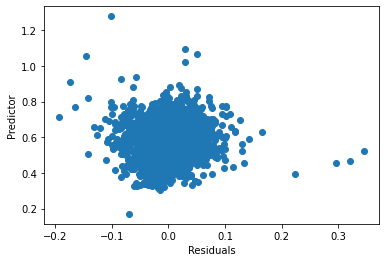

In [53]:
x = df['voterturnout12_pct']
y = df['voterturnout16_pct']

model = LinearModel()
model.fit(x, y)
model.print_equation()
model.plot_residuals()

Step 2:
The intetcept means that if the 2012 turnout was 0, the 2016 turnout predicted would be 8%. It does not make any sense since we don't really have records of a case where turnout was 0.
The slope means that our model, on average, predict an increase of 0.9 percentage point in the 2016 election for 1 percentage point in 2012.

Step 3
The conditions are not really met. The scatter plot of residuals against 2012 turnout shows patterns. A big bowl and a few points scattered. 

In [54]:
p = model.predict(0.52)
p

0.5421874335354311

In [35]:
y_gila = df[df.county == 'Gila'].voterturnout16_pct

In [42]:
y_gila = y_gila.values[0]

In [57]:
model.model_evaluation()['se']*100

3.5681000444083546

In [58]:
r_gila = y_gila - p

In [59]:
r_gila

0.3465749786645689

The residual for gila is 34.6%. It is a very unusual value sinces the 1se for the residual is 3.6%

In [61]:
x.corr(y)**2

0.8543481603988562